# DIFI Validation

The following analyses report a validation of the Dynamic Identity Fusion Index [1], a measure of a person's relationship to a target group (`$TARGET_GROUP`). For each of eight target groups, 250 people in the United States were instructed:

> The diagram below is designed to represent your relationship with `$TARGET_GROUP`. Please indicate your relationship by clicking and dragging the smaller "Me" circle to the position that best captures your relationship with `$TARGET_GROUP`.

Here is a sample DIFI user interface for the target group `USA`.

![difi](https://raw.githubusercontent.com/Dallinger/identityfusion/master/demo.gif)

[1] Jimenez, J., Gomez, A., Buhrmester, M. D., Vázquez, A., 
Whitehouse, H., & Swann, W. B. (2016). The dynamic identity fusion 
index: A new continuous measure of identity fusion for web-based 
questionnaires. *Social Science Computer Review*, 34(2), 215-228.

We begin by importing numerical processing and plotting tools:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next we define a function that plots a histogram of DIFI scores, with a vertical line at the median score.

In [2]:
import os 
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def plot(f, metric="Distance"):
    data = pd.read_csv(os.path.join("data", f))
    difi_scores = data[metric].values[~np.isnan(data[metric].values)]
    plt.hist(difi_scores, bins=20, color="#000000", ec='#FFFFFF')
    plt.axes().set_aspect(0.40)
    plt.axes().spines['right'].set_visible(False)
    plt.axes().spines['top'].set_visible(False)
    plt.ylim([0, 125])
    plt.title(f, loc='right')
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.axvline(np.median(difi_scores), color='grey', linewidth=2)
    plt.show()

## Experiment 1: a sanity check
The first experiment performed a sanity check to ensure that (1) our implementation of the DIFI produced valid overlap and distance measures, and (2) are sensitive enough to detect strong manipulations.

Condition 1 asked participants to select the group to which they feel the strongest sense of belonging. Then they completed the DIFI with respect to that group.

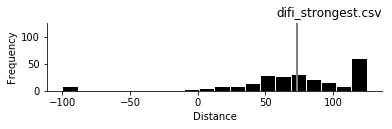

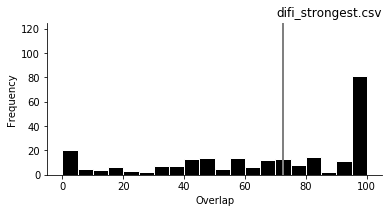

In [3]:
plot("difi_strongest.csv", metric="Distance")
plot("difi_strongest.csv", metric="Overlap")

This confirms that (1) our implementation produces valid DIFI distances and overlaps, and (2) most participants report a reasonably close relationship to the group to which they most strongly identify.

Condition 2 asked participants to select a group of which they are not a member, and then to complete the DIFI with respect to that group.

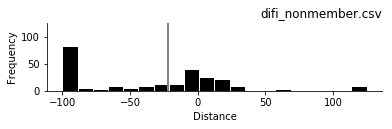

In [4]:
plot("difi_nonmember.csv", metric="Distance")

Most participants report a weak relationship with the selected group of which they are not a member.

## Experiment 2: minimal group paradigm
The second experiment used the minimal group paradigm to assess whether assigning participants a colorful avatar is enough to cause them to report a stronger relationship with the ingroup (participants assigned the same avatar color) than with the outgroup (participants assigned a different avatar color).

In one condition, participants were told that, in a future experiment, participants would be assigned an avatar with one of three possible colors. The participants then completed the DIFI with respect to the group consisting of all players assigned an avatar of a particular color, chosen at random.

In a second condition, participants were assigned an avatar and then completed the DIFI with respect to the outgroup.

In a third condition, participants were assigned an avatar and then completed the DIFI with respect to the ingroup.

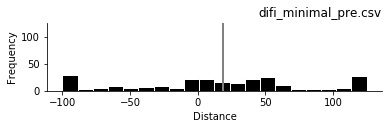

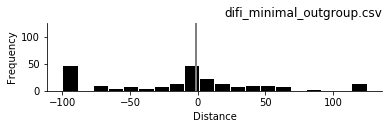

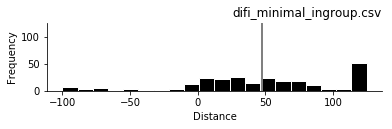

In [5]:
plot("difi_minimal_pre.csv", metric="Distance")
plot("difi_minimal_outgroup.csv", metric="Distance")
plot("difi_minimal_ingroup.csv", metric="Distance")

We replicate the minimal group paradigm: assigning people an arbitrary group label (here, avatar color) causes them to feel a stronger relationship with people who share that identity than people who were assigned a different identity. That divergence is the result of (A1) feeling a stronger-than-baseline relationship to the ingroup and (A2) feeling a weaker-than-baseline relationship to the outgroup, where the baseline is the pretest.

## Experiment 3a: Does a high DIFI score imply strong identity?

The DIFI prompt asks the participant to describe the "relationship" between the ego and the group and is thus not only a measure of belonging. We confirmed this in an experiment with three conditions.

In the first condition, participants completed the DIFI with respect to a group of which they are a member ("USA").

In the second condition, participants completed the DIFI with respect to a group of which they were not a member. In particular, participants selected a group of which they are not a member, then completed the DIFI with respect to that group.

In the third condition, participants completed the DIFI with respect to a group of which they are not a member, but with which they feel a close relationship.

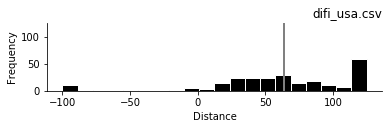

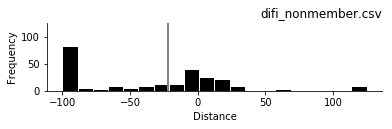

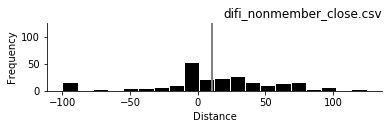

In [6]:
plot("difi_usa.csv")
plot("difi_nonmember.csv")
plot("difi_nonmember_close.csv")

We found that participants have a higher DIFI score for a group they feel a close relationship to, even if they do not feel any sense of belonging to that group.


## Experiment 3b: does a high DIFI score tell us anything about identity?

In the final experiment, we asked whether high DIFI scores are possible even for groups to which the participant could not possibly belong.

In one condition, participants completed the DIFI with respect to a group of which they are a member ("USA").

In a second condition, participants completed the DIFI with respect to a group to which they cannot belong ("kittens").

In a third condition, participants completed the DIFI with respect to a nonsensical group that cannot exist ("colorless green ideas that sleep furiously"). 

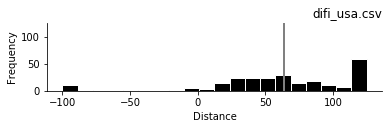

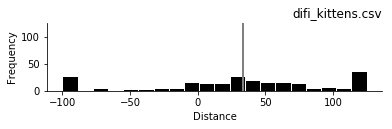

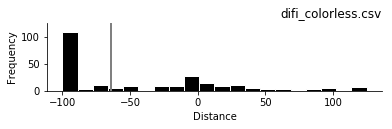

In [7]:
plot("difi_usa.csv")
plot("difi_kittens.csv")
plot("difi_colorless.csv")

We found that participants report a close relationship to the US, a reasonably close relationship to kittens, and a weak relationship with a non-sensical group. Taken in combination, moderate and high values of distance on the DIFI are possible even if the participant does not (or cannot) feel a strong sense of belonging to the group.